In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.data_loader import load_all

from src import impact_model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df, ref = load_all()
df.head()


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN


In [3]:
joined = impact_model.join_events_with_impacts(df)
joined


,record_id_impact,record_type_impact,category,pillar_impact,indicator_impact,indicator_code_impact,indicator_direction_impact,value_numeric_impact,value_text_impact,value_type_impact,...,impact_magnitude_event,impact_estimate_event,lag_months_event,evidence_basis_event,comparable_country_event,collected_by_event,collection_date_event,original_text_event,notes_event,event_year


In [4]:
matrix = impact_model.build_association_matrix(joined)
matrix


indicator_impact
category


Matrix is empty. No events linked to indicators. Displaying placeholder.


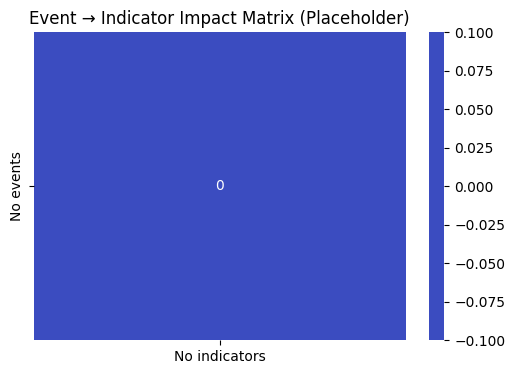

In [5]:
if matrix.empty:
    print("Matrix is empty. No events linked to indicators. Displaying placeholder.")
    # Create a placeholder for demonstration
    placeholder_matrix = pd.DataFrame(
        [[0]],
        index=["No events"],
        columns=["No indicators"]
    )
    plt.figure(figsize=(6,4))
    sns.heatmap(placeholder_matrix, annot=True, cmap="coolwarm", center=0)
    plt.title("Event → Indicator Impact Matrix (Placeholder)")
    plt.show()
else:
    plt.figure(figsize=(12,6))
    sns.heatmap(matrix, annot=True, cmap="coolwarm", center=0)
    plt.title("Event → Indicator Impact Matrix")
    plt.show()


In [6]:
access = df[df["indicator_code"] == "ACC_OWNERSHIP"].copy()
access["year"] = pd.to_datetime(access["observation_date"]).dt.year

series = access.set_index("year")["value_numeric"]
series


year
2014    22.0
2017    35.0
2021    46.0
2021    56.0
2021    36.0
2024    49.0
2025    70.0
Name: value_numeric, dtype: float64

In [9]:
acc_events = joined[joined["indicator_impact"] == "ACC_OWNERSHIP"]

predicted = impact_model.apply_event_effects(series, acc_events)


In [10]:
comparison = impact_model.validate_against_history(series, predicted)
comparison


,actual,predicted,error,abs_error
year,,,,
2014,22.0,22.0,0.0,0.0
2017,35.0,35.0,0.0,0.0
2021,46.0,46.0,0.0,0.0
2021,56.0,56.0,0.0,0.0
2021,36.0,36.0,0.0,0.0
2024,49.0,49.0,0.0,0.0
2025,70.0,70.0,0.0,0.0


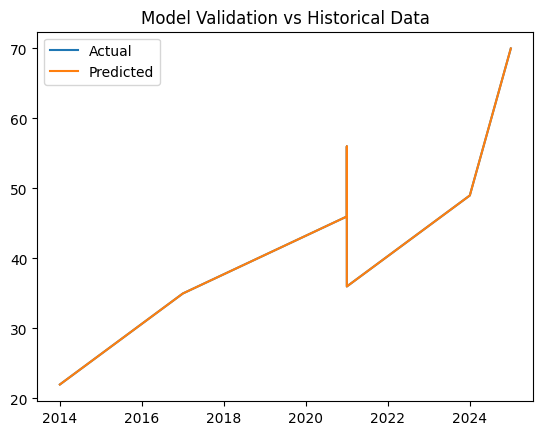

In [11]:
plt.plot(series.index, series, label="Actual")
plt.plot(predicted.index, predicted, label="Predicted")
plt.legend()
plt.title("Model Validation vs Historical Data")
plt.show()
